# Linear Regression for Human Beings

Let's try to explain some linear regression concepts without formulas or official definitions or anything things like that!

<p class="reading-options">
  <a class="btn" href="/regression/linear-regression">
    <i class="fa fa-sm fa-book"></i>
    Read online
  </a>
  <a class="btn" href="/regression/notebooks/Linear Regression.ipynb">
    <i class="fa fa-sm fa-download"></i>
    Download notebook
  </a>
  <a class="btn" href="https://colab.research.google.com/github/littlecolumns/ds4j-notebooks/blob/master/regression/notebooks/Linear Regression.ipynb" target="_new">
    <i class="fa fa-sm fa-laptop"></i>
    Interactive version
  </a>
</p>

## Introduction

**We sell coffee, and it costs &#36;2.** Since we're 💼💰Important Business People💰💼, we might have some big questions about finance, such as:

* If we sell **zero coffees**, how much money do we make?
* If we sell **four coffees**, how much money do we make?
* If we sell **sixteen coffees**, how much money do we make?

Since coffee costs &#36;2, we can just multiply it out.

|☕|✖|💵|
|---|---|---|
|We sell zero coffees|`0 × $2 per coffee`|We make &#36;0|
|We sell four coffees|`4 × $2 per coffee`|We make &#36;8|
|We sell sixteen coffees|`16 × $2 per coffee`|We make &#36;32|

Since coffee costs &#36;2, in these situations we would make &#36;0, &#36;8, and &#36;32. Easy-peasy!

Linear regression, if we're going to skip over the specifics, is the **opposite of what we just did.** If we take the same example but twist it around a little bit, we can see how regression works.

**Let's say we know this:**

* We sold **zero coffees**, and made &#36;0
* We sold **four coffees**, and made &#36;8
* We sold **sixteen coffees**, and made &#36;32

Linear regression is when we ask ourselves, **how much does coffee cost?** Let's draw that same table again, but adjusted for our new question.

|☕|✖|💵|
|---|---|---|
|We sell zero coffees|`0 × ??? per coffee`|We make &#36;0|
|We sell four coffees|`4 × ??? per coffee`|We make &#36;8|
|We sell sixteen coffees|`16 × ??? per coffee`|We make &#36;32|

Maybe we can even figure it out in our heads: **coffee costs &#36;2!** Easy, right? That's it. We're done!! That's linear regression!!

Kind of, sort of, more or less, anyway. Let's move on to see how **linear regression works in Python code.**

## Performing a linear regression

We'll start off  with our data. To wrangle our data we're going to use [pandas](https://pandas.pydata.org/), a super-popular Python library for doing data-y things.

In [1]:
import pandas as pd

df = pd.DataFrame([
    { 'sold': 0, 'revenue': 0 },
    { 'sold': 4, 'revenue': 8 },
    { 'sold': 16, 'revenue': 32 },
])
df

,sold,revenue
0,0,0
1,4,8
2,16,32


Our very tiny dataset has two columns:

* Number of coffees sold
* Amount of revenue from selling those coffees

We want to ask a simple question using this data: **if we sold this many coffees and made this much money, how much does a coffee cost?** Up above we learned that this kind of question is **linear regression**.

To perform our linear regression, we're going to use a library called [statsmodels](https://www.statsmodels.org), which conveniently (?) has two different ways of writing the code.

### Formula style

One way to calculate how much the coffee costs is [writing a formula](https://www.statsmodels.org/stable/example_formulas.html). It seems to be a less popular way of doing regressions in statsmodels, but _it's so nice and perfect_ that we're going to look at it first.

In [2]:
import statsmodels.formula.api as smf

# What effect does the number of coffees sold have on our revenue?
model = smf.ols(formula='revenue ~ sold', data=df)
results = model.fit()

It doesn't print anything out, but that's okay: we'll figure out how to look at the results in a second!

### Dataframe style

The other style of using statsmodels for linear regression uses pandas dataframes **directly** instead of writing out a formula. It can be a little more complicated looking, but it's very popular! It must be the default technique people learn when they pick up statsmodels.

In [3]:
import statsmodels.api as sm

# What effect does the number of coffees sold have on our revenue?
X = df[['sold']]
y = df.revenue

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

Don't worry about `sm.add_constant(X)`, we'll talk about it later.

> Note: To be specific, the kind of regression we're using is called **ordinary least squares** regression, which is why we're using `smf.ols` and `sm.OLS`. Statsmodels supports [other types](https://www.statsmodels.org/stable/regression.html), too.

## Examining our results

No matter which method we use to calculate how much coffee costs, we end up with a variable called `results`. **We'll use this variable to see the answer.**

If we _only_ want the most basic of results, we can write something like this:

In [4]:
results.params

const   -2.664535e-15
sold     2.000000e+00
dtype: float64

The `2.000000e+00` next to `sold` means for every coffee sold, we make &#36;2! If we want to get technical, it really means "for every increase of 1 in `sold`, our `revenue` will increase by 2."

While it's definitely useful, it unfortunately doesn't look very fancy. We like ✨🌟💎 𝒻𝒶𝓃𝒸𝓎 𝓉𝒽𝒾𝓃𝑔𝓈 💎🌟✨, so we'll run this code instead:

In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.502e+30
Date:                Sat, 07 Dec 2019   Prob (F-statistic):           2.07e-16
Time:                        13:32:47   Log-Likelihood:                 94.907
No. Observations:                   3   AIC:                            -185.8
Df Residuals:                       1   BIC:                            -187.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.665e-15   6.18e-15     -0.431      0.741   -8.12e-14    7.58e-14
sold           2.0000   6.49e-16   3.08e+15      0.000       2.000       2.000
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.149
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.471
Skew:                          -0.616   Prob(JB):                        0.790
Kurtosis:                       1.500   Cond. No.                         13.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nice, right? But it's a **lot of information,** so let's take a closer look at some of the bits and pieces.

### Reading our summary

The fancy style has the same results as `results.params` - try to find `sold` and `2.0000` hiding on the left a ways down.

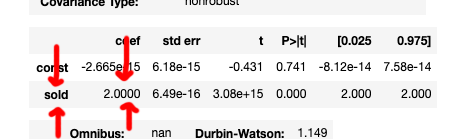


We can put this into words like this:

* For every one more "sold" we have, we get two more "revenue"
* For every one point increase in sold, we'll have a two point increase in revenue

I know we weren't supposed to get technical, but just so you know: the `2.0000` is called the **coefficient**. The coefficient for `sold` is how much `revenue` will change if `sold` goes up by one.

**`sold` isn't our only only coefficient, though!** There's also the `const` one right above it, which is `-2.665e-15`.

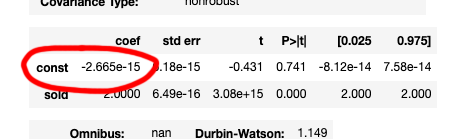

### Explaining the intercept

`const` basically means "how much money we've made if we've sold **zero coffees**." It's called `Intercept` when you use the formula-style regression, even though it'll be exact same number.

In this case, `const` is `-2.665e-15`. The `e-15` part means "move the decimal point 15 places to the left to see what the number really is." That means when we sell zero coffees, we make `-0.000000000000002665` dollars. That's basically zero, right?

We need the constant in our regression because sometimes it isn't zero coffees making zero dollars. What if instead we were talking about scores on a test based on hours of studying?

More studying would (hopefully) give us a higher score, but if we **studied for zero hours** we (hopefully) wouldn't score a zero on the test. If `const` were 70, that would mean even if you study for zero hours, you're **predicted to get a 70 on the test.**

Formula-style regression automatically adds a constant, but the dataframe version requires you to use `sm.add_constant(X)`:

> model = sm.OLS(y, sm.add_constant(X))

If you use `model = sm.OLS(y, X)` instead, the regression would insist that studying for zero hours deserves a zero. Ouch!

Why does the formula technique do it the friendly way by default, but the dataframe version make us take an extra step? _No clue._ Maybe regression just seemed _too easy_ without something like that to trip us up. Yet another reason to stick with the formula version!

## Review

OK, so what did we just learn?

Sometimes we know how many cups of coffee we sold and how much each coffee costs, and we want to know how much money we made.

|☕|✖|💵|
|---|---|---|
|We sell zero coffees|`0 × $2 per coffee`|We make ???|
|We sell four coffees|`4 × $2 per coffee`|We make ???|
|We sell sixteen coffees|`16 × $2 per coffee`|We make ???|

That is **not** linear regression. That is, I don't know, normal math?

Linear regression is when **we know how much money we made and how many coffees we sold, but not how much coffee is.** 

|☕|✖|💵|
|---|---|---|
|We sell zero coffees|`0 × ??? per coffee`|We make &#36;0|
|We sell four coffees|`4 × ??? per coffee`|We make &#36;8|
|We sell sixteen coffees|`16 × ??? per coffee`|We make &#36;32|

If we want to risk sounding halfway technical, linear regression is a question of "how do the inputs affect the number that comes out at the end."